# Homework #2:
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 2/9/2020|

## The Quadratic Equation

The roots of a quadratic polynomial,

\begin{equation}
ax^2 + bx + c, \quad a\neq0,
\tag{1}
\end{equation}

can be found analytically with either of the following two formulas:

\begin{equation}
x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a},
\tag{2}
\end{equation}

\begin{equation}
x^\prime_{1,2} = \frac{-2c}{b \pm \sqrt{b^2 - 4ac}},
\tag{3}
\end{equation}

where
\begin{equation}
b^2 - 4ac
\tag{4}
\end{equation}

is the ***discriminant***. A quadratic polynomial, with _real_ coefficients $a, b,$ and $c$, has two distinct real roots if the discriminant is positive and two complex roots if it is negative. The two roots are equal if and only if the discriminant is zero.

### A. Functions to Calculate
Let's first write two separate functions to calculate and return the real quadratic roots given by Eqs. 2 and 3.

In [137]:
import math

def quadroots1(c):
    """
    Return the real roots of a quadratic with real coefficients given in c (see Eq. 2).
    
    The values in the rank-1 array `c` are real coefficients of a quadratic.
    Since p is of length 3, the quadratic is described by::

        c[0] * x**2 + c[1] * x + c[2]
    
    Parameters
    ----------
    c : array_like
        Rank-1 array with length 3 of real quadratic coefficients.
    
    Returns
    -------
    roots : ndarray
        An array containing the real roots of the quadratic.
    
    Raises
    ------
    ValueError
        When `c` is not of length 3, c[0] = 0, or the discriminant is negative (i.e., complex roots).
    """
    if len(c) != 3:
        raise ValueError("Input must be a rank-1 array with length 3.")
    elif c[0] == 0:
        raise ValueError("Second-degree coefficient, a, cannot be 0.")
    else:
        a, b, c = c[0], c[1], c[2] # store coefficients
        disc = b*b - 4*a*c         # discriminant
        
        if disc < 0:
            raise ValueError("Discriminant negative (complex roots).")
        
        x = (-b + math.sqrt(disc))/2/a
        roots = [x]
        if disc > 0:               # two distinct real roots       
            x = (-b - math.sqrt(disc))/2/a
            roots.append(x)
        return roots

In [138]:
import math

def quadroots2(c):
    """
    Return the real roots of a quadratic with real coefficients given in c (see Eq. 3).
    
    The values in the rank-1 array `c` are real coefficients of a quadratic.
    Since p is of length 3, the quadratic is described by::

        c[0] * x**2 + c[1] * x + c[2]
    
    Parameters
    ----------
    c : array_like
        Rank-1 array with length 3 of real quadratic coefficients.
    
    Returns
    -------
    roots : ndarray
        An array containing the real roots of the quadratic.
    
    Raises
    ------
    ValueError
        When `c` is not of length 3, c[0] = 0, or the discriminant is negative (i.e., complex roots).
    """
    if len(c) != 3:
        raise ValueError("Input must be a rank-1 array with length 3.")
    elif c[0] == 0:
        raise ValueError("Second-degree coefficient, a, cannot be 0.")
    else:
        a, b, c = c[0], c[1], c[2] # store coefficients
        disc = b*b - 4*a*c         # discriminant
        
        if disc < 0:
            raise ValueError("Discriminant negative (complex roots).")
        elif disc == 0 and b == 0:
            return [0]             # avoid division by zero
        else:
            x = -2*c/(b + math.sqrt(disc))
            roots = [x]
            if disc > 0:               # two distinct real roots       
                x = -2*c/(b - math.sqrt(disc))
                roots.append(x)
            return roots

We can try these solvers out with an easy example. First let's graph

\begin{equation}
f(x) = x^2 - 1.
\tag{5}
\end{equation}

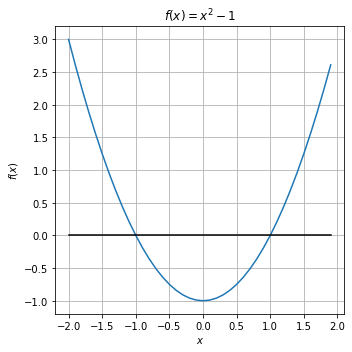

In [171]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x*x - 1
x = np.arange(-2, 2, 0.1)

plt.figure(figsize=[5,5])
plt.title(r'$f(x) = x^2 - 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.plot(x, f(x))
plt.plot(x, x*0, 'k')
plt.tight_layout()
plt.show()

### First with $n$ = 1, 3, 5

In [ ]:
x = np.arange(-np.pi, np.pi, 0.01)
y1 = f(x, 1)
y3 = f(x, 3)
y5 = f(x, 5)

xticks = np.arange(-np.pi, np.pi+np.pi/4, np.pi/4)
xlabels = [r'$-\pi$',r'$-3\pi/4$',r'$-\pi/2$',
           r'$-\pi/4$',0,r'$\pi/4$',
           r'$\pi/2$',r'$3\pi/4$',r'$\pi$']
yticks = np.arange(-2*np.pi, 2*np.pi+np.pi/4, np.pi/4)
ylabels = [r'$-2\pi$',r'$-7\pi/8$',r'$-3\pi/2$',r'$-5\pi/4$',
           r'$-\pi$',r'$-3\pi/4$',r'$-\pi/2$',r'$-\pi/4$',0,
           r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$',
           r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/8$',r'$2\pi$',]

plt.figure(figsize=[5,10])
plt.title(r'$f(x)$ for various $n$')
plt.xlabel(r'$x$')
plt.xlim(-np.pi,np.pi)
plt.xticks(xticks, xlabels)
plt.ylabel(r'$f(x)$')
plt.ylim(-2*np.pi,2*np.pi)
plt.yticks(yticks, ylabels)
plt.grid()
plt.plot(x, y1, label=r'$n=1$')
plt.plot(x, y3, label=r'$n=3$')
plt.plot(x, y5, label=r'$n=5$')
plt.legend(loc="best")
plt.show()